<a href="https://colab.research.google.com/github/luciedum-dot/Intro-to-data-analysis-with-Python---Final-Project/blob/main/Evolutions_of_Criminality_France_2016_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleaning notebook
This notebook will be used for the first part of our project, which is data cleaning


In [3]:
!pip install pandas numpy

import pandas as pd
import numpy as np



In [4]:
!git clone https://github.com/luciedum-dot/Intro-to-data-analysis-with-Python---Final-Project.git



Cloning into 'Intro-to-data-analysis-with-Python---Final-Project'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 77 (delta 32), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (77/77), 453.62 KiB | 11.34 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [5]:
#Read Excel File - total accused people and display the sheets' names

path = "Intro-to-data-analysis-with-Python---Final-Project/Data/mec.xlsx"

xls = pd.ExcelFile(path)
xls.sheet_names


['Lisez moi',
 '1.sexe - age',
 '2.nationalité',
 '3.sexe',
 '4.nationalité majmin',
 '5.PM - PP']

In [85]:
#Show the Excel File on the sheet sex, in order to look at the "total" column for every year and see the trend

#Read Excel on the sheet 3.sexe, skipping the first 2 rows and setting multiple headers (years and categories)
df = pd.read_excel(path, sheet_name="3.sexe", skiprows=2, header=[0, 1])

#Remove the 1st empty column of the sheet
df = df.iloc[:,1:]

#Pivot the year header
pivoted_df = (
    df
    .set_index("Sexe")
    .stack(level=1)          # move second header to rows
    .reset_index()           # make it a column
    .rename(columns={"level_1": "year"})
  )

#Cast the type of Sexe column from tupple to string
pivoted_df["Sexe"] = pivoted_df["Sexe"].str[0]

pivoted_df.head(30)

/tmp/ipython-input-4167305671.py:13: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(level=1)          # move second header to rows


,Sexe,year,Homicides (y compris coups et blessures volontaires suivis de mort),Tentatives d'homicide,Violences physiques dans le cadre intra-familial,Violences physiques hors cadre intra-familial,Violences sexuelles,Viols et tentatives de viols,Vols avec arme,Vols violents sans arme,Vols sans violence contre des personnes,Cambriolages de logement,Vols de véhicule,Vols dans les véhicule,Vols d'accessoires sur les véhicules,Destructions et dégradations volontaires,Escroqueries et fraudes aux moyens de paiements,Trafic de stupéfiants,Usage de stupéfiants
0,Femme,2016,135,195,15202,21601,1735,179,257,1574,16709,2953,991,1018,297,7981,20123,3489,16569
1,Femme,2017,174,196,16166,22340,1744,157,285,1398,16490,2898,959,1437,361,8435,19650,3693,17431
2,Femme,2018,188,197,16964,23212,2226,212,235,1389,16756,3021,1087,1303,258,8537,19190,3996,17267
3,Femme,2019,159,209,19064,22809,2166,264,239,1224,16352,3458,875,934,325,9433,17646,4275,16410
4,Femme,2020,148,254,22112,20139,2367,329,240,1137,13291,2548,892,964,404,8740,15767,3680,14221
5,Femme,2021,163,258,27604,21514,2731,419,216,982,14264,2396,983,1181,206,8378,16538,4015,17730
6,Femme,2022,173,294,32347,21104,2846,524,213,970,12799,2549,975,1040,316,7955,13251,4293,19178
7,Femme,2023,217,347,38058,22519,3154,644,253,1095,13423,2853,1285,841,310,8467,13499,4397,21969
8,Femme,2024,192,345,41543,22977,3642,739,273,905,12694,2729,1257,957,272,8665,12668,5090,21888
9,Homme,2016,851,1676,81190,105280,36515,10502,5474,17477,56807,39796,25072,24294,7220,70230,43860,37230,165861


In [ ]:
#Show Excel File - Total accused people

df = pd.read_excel(path, sheet_name="5.PM - PP")
df.head()

,Unnamed: 0,Nombre de de mis en cause pour des infractions élucidées par la police et la gendarmerie nationales selon la personnalité juridique de 2016 à 2024,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2016,2017,2018,2019,2020,2021,2022,2023,2024
2,NaN,Homicides (y compris coups et blessures volont...,Personne morale,<5,0,0,0,0,0,0,<5,0
3,NaN,NaN,Personne physique,986,1124,1202,1124,1076,1175,1358,1427,1448
4,NaN,Tentatives d'homicide,Personne morale,0,0,0,0,0,0,0,0,0


In [ ]:
#Only work with lines about individuals "personnes physiques" and not companies "personnes morales"

df_PP = df.iloc[1::2].reset_index(drop=True)
df_PP.head()

,Unnamed: 0,Nombre de de mis en cause pour des infractions élucidées par la police et la gendarmerie nationales selon la personnalité juridique de 2016 à 2024,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,NaN,NaN,Personne physique,986,1124,1202,1124,1076,1175,1358,1427,1448
2,NaN,NaN,Personne physique,1871,2162,2318,2393,2609,2802,3099,3462,3390
3,NaN,NaN,Personne physique,96392,99234,106902,120950,138026,164256,180057,195000,197954
4,NaN,NaN,Personne physique,126881,130463,140508,136623,126220,133195,131188,137540,136407


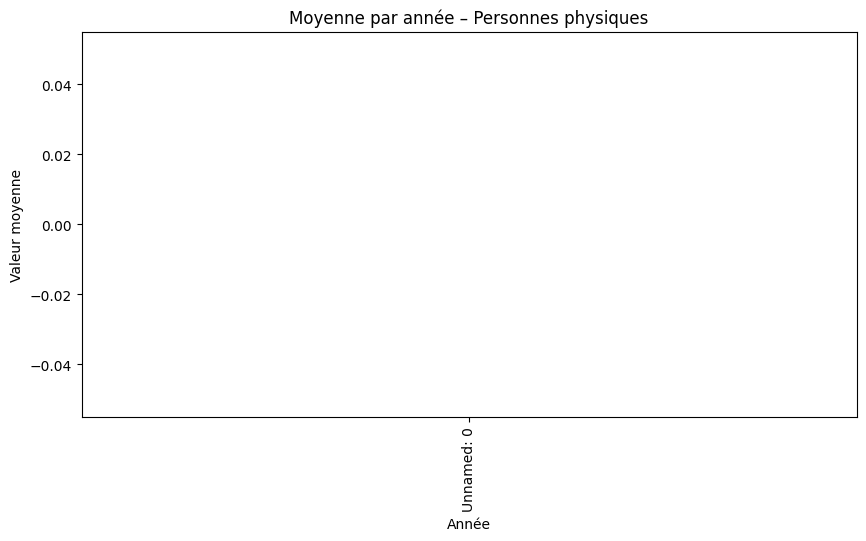

In [ ]:
#Trial for first visualisation

df_PP_numeric = df_PP.select_dtypes(include="number")

df_PP_numeric.mean().plot(kind="bar", figsize=(10,5))
plt.title("Moyenne par année – Personnes physiques")
plt.xlabel("Année")
plt.ylabel("Valeur moyenne")
plt.show()

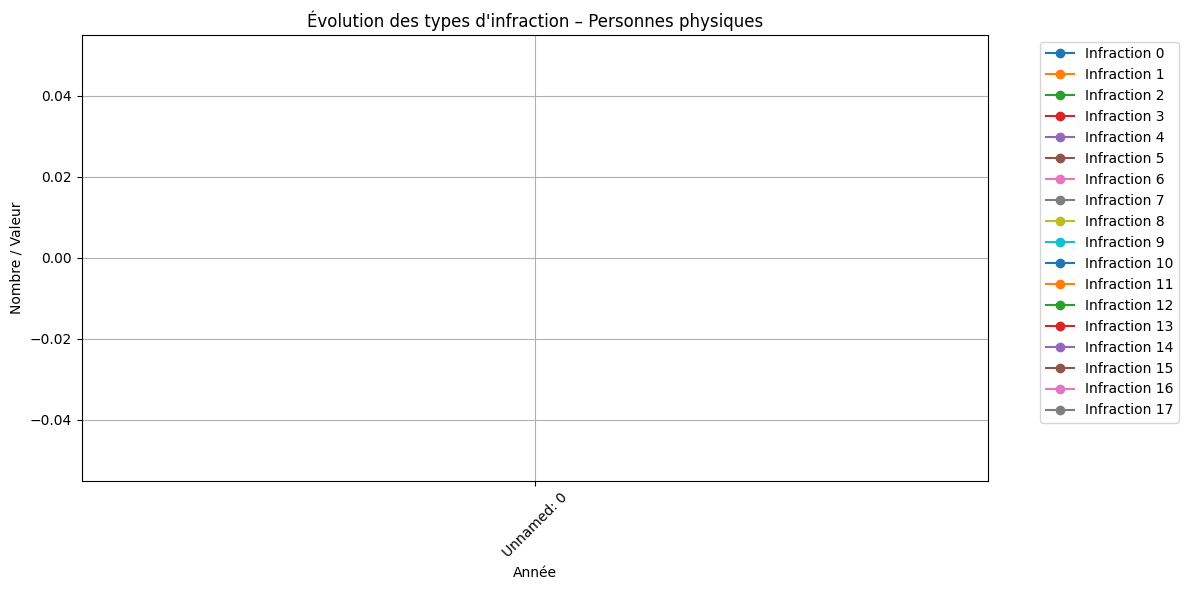

In [ ]:
df_numeric = df_PP.select_dtypes(include="number")

df_numeric.index = df_PP.index  # garder les lignes comme index

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for idx, row in df_numeric.iterrows():
    plt.plot(df_numeric.columns, row, marker='o', label=f'Infraction {idx}')

plt.title("Évolution des types d'infraction – Personnes physiques")
plt.xlabel("Année")
plt.ylabel("Nombre / Valeur")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # légende à côté
plt.grid(True)
plt.tight_layout()
plt.show()

test